<a href="https://colab.research.google.com/github/YOUGALAKSHMI/Data-Analysis-Visuvalization/blob/main/covidpredicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
covid=pd.read_csv("/content/drive/MyDrive/Covid 19 dataset edited 1.csv")

In [ ]:
covid.shape

(830, 5)

In [ ]:
covid.head()

,Date,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
0,30-01-2020,Kerala,1,0,0
1,02-02-2020,Kerala,2,0,0
2,03-02-2020,Kerala,3,0,0
3,02-03-2020,Kerala,3,0,0
4,03-03-2020,Kerala,3,0,0


In [ ]:
covid.describe()

,Total Confirmed Cases,Cured/Discharged/Migrated,Death
count,830.000000,830.000000,830.000000
mean,234708.001205,205268.972289,2474.136145
std,292770.888072,275788.046635,3529.675573
min,1.000000,0.000000,0.000000
25%,1703.500000,695.500000,21.000000
50%,51215.000000,29459.500000,326.000000
75%,474572.000000,395222.750000,4568.250000
max,870675.000000,857233.000000,11762.000000


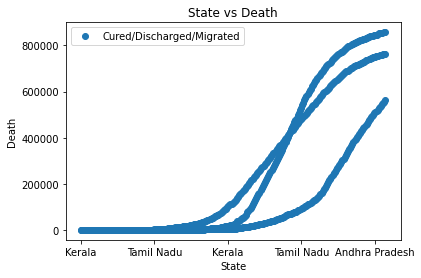

In [ ]:
covid.plot(x='State',y='Cured/Discharged/Migrated',style='o')
plt.title('State vs Death')
plt.xlabel('State')
plt.ylabel('Death')
plt.show()

In [ ]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
covid['State'] = le.fit_transform(covid['State'])
covid.head()

,Date,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
0,30-01-2020,1,1,0,0
1,02-02-2020,1,2,0,0
2,03-02-2020,1,3,0,0
3,02-03-2020,1,3,0,0
4,03-03-2020,1,3,0,0


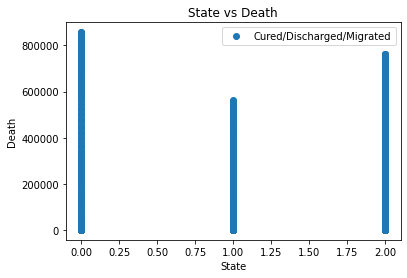

In [ ]:
covid.plot(x='State',y='Cured/Discharged/Migrated',style='o')
plt.title('State vs Death')
plt.xlabel('State')
plt.ylabel('Death')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
y=covid.Death
x=covid.drop('Date',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train

,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
428,2,199749,143297,3320
751,1,486109,402477,1692
718,1,411464,316692,1403
533,2,409238,349682,7050
504,0,306261,218311,2820
...,...,...,...,...
763,1,508256,428529,1796
192,0,1777,729,36
629,0,687351,622136,5780
559,1,84759,62555,337


In [ ]:
y_train

428     3320
751     1692
718     1403
533     7050
504     2820
       ...  
763     1796
192       36
629     5780
559      337
684    10586
Name: Death, Length: 664, dtype: int64

In [ ]:
x_test

,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
647,0,723512,666433,6019
31,0,1,0,0
474,0,217040,129615,1939
8,1,3,0,0
382,1,6195,3559,27
...,...,...,...,...
496,1,42885,27795,146
802,1,578363,511008,2121
766,1,514060,434730,1822
780,2,763282,737281,11531


In [ ]:
y_test

647     6019
31         0
474     1939
8          0
382       27
       ...  
496      146
802     2121
766     1822
780    11531
363      198
Name: Death, Length: 166, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_test, y_test)

LinearRegression()

In [ ]:
print(regressor.intercept_)

9.094947017729282e-13


In [ ]:
print(regressor.coef_)

[ 8.66421087e-13 -2.11636264e-16  2.51534904e-16  1.00000000e+00]


In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
y_test

647     6019
31         0
474     1939
8          0
382       27
       ...  
496      146
802     2121
766     1822
780    11531
363      198
Name: Death, Length: 166, dtype: int64

In [ ]:
y_pred

array([6.01900000e+03, 9.09283066e-13, 1.93900000e+03, 1.77528088e-12,
       2.70000000e+01, 5.80000000e+01, 1.03710000e+04, 1.08900000e+03,
       4.00000000e+00, 8.84000000e+02, 4.57100000e+03, 9.08436520e-13,
       2.00000000e+01, 5.41000000e+03, 1.40000000e+01, 5.90000000e+01,
       9.55000000e+02, 5.00000000e+00, 1.48400000e+03, 9.45300000e+03,
       1.20000000e+02, 3.30000000e+01, 5.24400000e+03, 4.92700000e+03,
       4.00000000e+00, 6.00000000e+00, 1.96600000e+03, 1.53300000e+03,
       9.00000000e+01, 2.64212524e-12, 1.13440000e+04, 1.80000000e+01,
       5.17700000e+03, 7.92500000e+03, 4.00000000e+00, 3.15000000e+02,
       1.77401106e-12, 9.78400000e+03, 5.64100000e+03, 3.70000000e+01,
       6.42900000e+03, 5.20000000e+01, 2.40000000e+01, 9.98400000e+03,
       1.04720000e+04, 8.40000000e+01, 1.20600000e+03, 1.08580000e+04,
       8.00000000e+00, 1.12990000e+04, 5.86900000e+03, 6.88100000e+03,
       1.84200000e+03, 2.20000000e+01, 5.90000000e+03, 4.00000000e+00,
      

In [ ]:
df=pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
df


,Actual,Predicted
0,647 6019 31 0 474 1939 8 ...,"[6019.000000000006, 9.092830655088591e-13, 193..."


In [ ]:
df1=['y_test']
df1

['y_test']

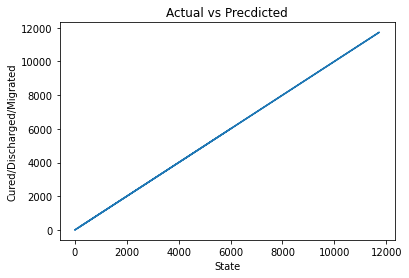

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test,y_pred)
plt.title('Actual vs Precdicted')
plt.xlabel('State')
plt.ylabel('Cured/Discharged/Migrated')
plt.show()


In [ ]:
from sklearn import metrics
print('Mean absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error 4.387708097353774e-12
Mean squared error 3.970531685690132e-23
Root mean squared error 6.301215506305217e-12


In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
647,6019,6.019000e+03
31,0,9.092831e-13
474,1939,1.939000e+03
8,0,1.775281e-12
382,27,2.700000e+01
...,...,...
496,146,1.460000e+02
802,2121,2.121000e+03
766,1822,1.822000e+03
780,11531,1.153100e+04


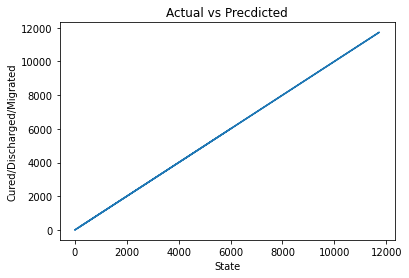

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test,y_pred)
plt.title('Actual vs Precdicted')
plt.xlabel('State')
plt.ylabel('Cured/Discharged/Migrated')
plt.show()


In [ ]:
from sklearn import metrics
print('Mean absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error 4.387708097353774e-12
Mean squared error 3.970531685690132e-23
Root mean squared error 6.301215506305217e-12
